In [1]:
import plotly

from ctr.reader.reader import Reader
from ctr.resources import *
from ctr.segmentation import BackgroundSubstraction
from ctr.reconstruction import LineFitter, WeightedGraph, transform, transform_many, show_robot_3d, join_corresp_coors
import numpy as np
import ctr.reconstruction.line_fitter as lf
import ctr.reconstruction.error as err
import ctr.reconstruction.visualising as vis
from scipy.io import savemat

from importlib import reload
reload(lf)
reload(err)
reload(vis)

<module 'ctr.reconstruction.visualising' from 'C:\\Users\\Blanca\\Documents\\CTR_Reconstruction\\ctr\\reconstruction\\visualising.py'>

In [2]:
reader = Reader()

# Read original camera images and background
cam1imgs, cam2imgs, backimg = reader.read_images(CAM1_FOLDER, CAM2_FOLDER, BACKG_FOLDER)

# Apply segmentation from part 1 to each set
segmentor = BackgroundSubstraction()
contours_cam1 = segmentor.segmentImgs(cam1imgs, backimg)
contours_cam2 = segmentor.segmentImgs(cam2imgs, backimg)

# Fit polynomials to robot body in order to minimise points to transform, save to csvs
lf = LineFitter()
cam1_lf = lf.fitLines(cam1imgs, 1, contours_cam1, save_folder=LF_RESULTS_FOLDER)
cam2_lf = lf.fitLines(cam2imgs, 2, contours_cam2, save_folder=LF_RESULTS_FOLDER)

good_fits = [5, 6, 7, 8]
good_coor_sets = {}

for gf in good_fits:
    corresp = [cam1_lf[gf],  cam2_lf[gf]]
    good_coor_sets.update({gf : corresp})

In [3]:
wg = WeightedGraph()
# graph_matches = GRAPH_MATCHES
graph_matches = {}
print('Applying weighted graph...')
# Apply weighted graph matching to sets of coordinates
for idx in good_coor_sets.keys():
    c1 = good_coor_sets.get(idx)[0]
    c2 = good_coor_sets.get(idx)[1]
    wg.set_pairs(c1, c2)
    row_idx, col_idx = wg.solve()
    matching = [row_idx, col_idx]
    graph_matches.update({idx: matching})
    wg.clear()
    print((idx - 4) / len(good_coor_sets.keys()))

# print(graph_matches.items())

Applying weighted graph...
Finding sum assignment...
0.25
Finding sum assignment...
0.5
Finding sum assignment...
0.75
Finding sum assignment...
1.0


In [4]:
# rerturns dict of idx : [c1coors, c2coors]
corresp_coors = join_corresp_coors(good_coor_sets, graph_matches)

robots = transform_many(corresp_coors)

hi
[[[167, 462.44671414313575], [96, 135.03529352932975]], [[168, 460.696750855436], [97, 135.6583572014198]], [[169, 458.95851523871715], [95, 134.40983785383855]], [[170, 457.23176109655924], [94, 133.7819843301374]], [[171, 455.5162422325419], [93, 133.15172711341737]], [[172, 453.8117124502452], [98, 136.27903471491757]], [[173, 452.11792555324905], [92, 132.51906035886967]], [[174, 450.43463534513285], [91, 131.88397822168542]], [[175, 448.76159562947714], [90, 131.24647485705577]], [[176, 447.09856020986115], [89, 130.6065444201719]], [[177, 445.4452828898653], [99, 136.89733191463193]], [[178, 443.8015174730692], [88, 129.96418106622488]], [[179, 442.16701776305285], [87, 129.3193789504059]], [[180, 440.5415375633959], [86, 128.6721322279061]], [[181, 438.9248306776783], [100, 137.51325464537172]], [[182, 437.31665090948013], [85, 128.02243505391664]], [[183, 435.7167520623809], [84, 127.37028158362867]], [[184, 434.1248879399609], [83, 126.71566597223328]], [[185, 432.540812345

In [5]:
print(graph_matches[5])
print(good_coor_sets[5][1][23])

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159]), array([ 22,  23,  21,  20,  19,  24,  18,  17,  16,  15,  25,  14,  13,
        12,  26,  11,  10,   9,   

In [39]:
new_robs = {}
for rob in robots:
    new_entry = []
    arr = robots.get(rob)
    new_entry = [list(a) for a in arr]
    new_robs[rob] = new_entry

showing figure...
showing figure...
showing figure...
showing figure...


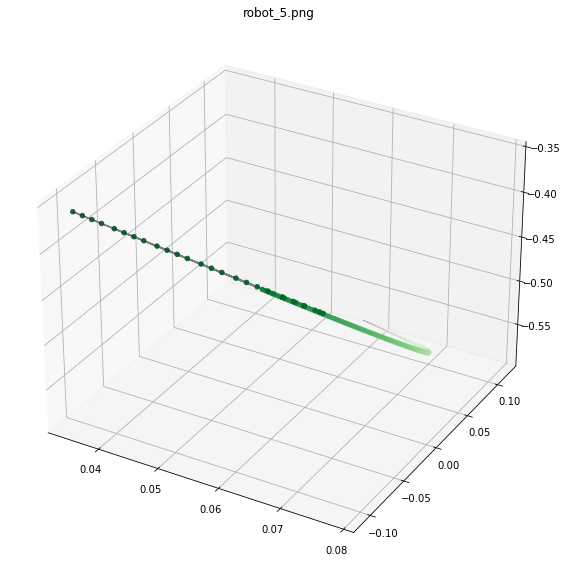

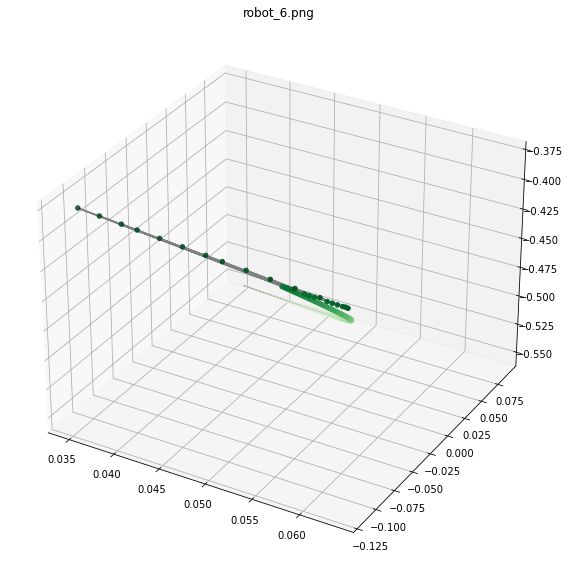

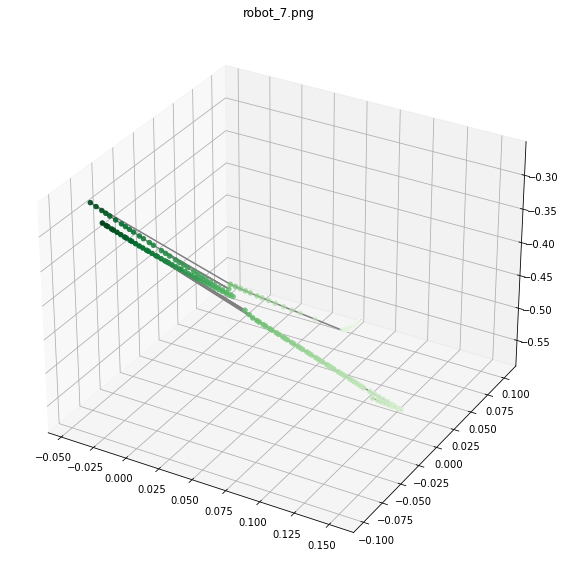

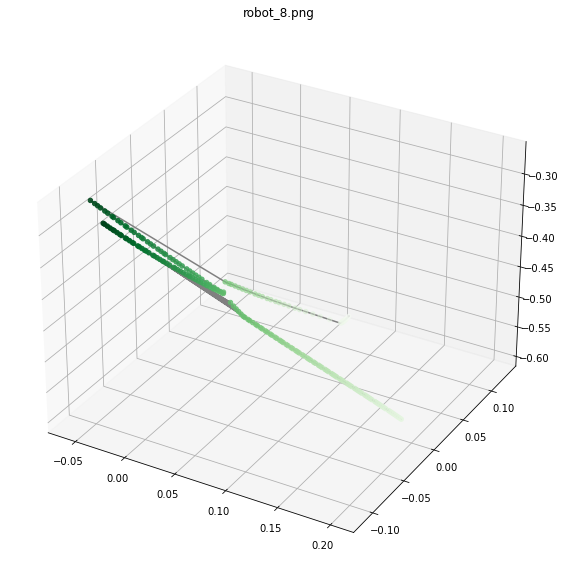

In [8]:
show_robot_3d(robots)

In [7]:
for key in robots.keys():
    name = f'rob{key}.mat'
    np.savetxt(name, robots[key])

In [48]:
print(corresp_coors[5])

[[[167, 462.44671414313575], [96, 135.03529352932975]], [[167, 462.44671414313575], [97, 135.6583572014198]], [[167, 462.44671414313575], [95, 134.40983785383855]], [[167, 462.44671414313575], [94, 133.7819843301374]], [[167, 462.44671414313575], [93, 133.15172711341737]], [[167, 462.44671414313575], [98, 136.27903471491757]], [[167, 462.44671414313575], [92, 132.51906035886967]], [[167, 462.44671414313575], [91, 131.88397822168542]], [[167, 462.44671414313575], [90, 131.24647485705577]], [[167, 462.44671414313575], [89, 130.6065444201719]], [[167, 462.44671414313575], [99, 136.89733191463193]], [[167, 462.44671414313575], [88, 129.96418106622488]], [[167, 462.44671414313575], [87, 129.3193789504059]], [[167, 462.44671414313575], [86, 128.6721322279061]], [[167, 462.44671414313575], [100, 137.51325464537172]], [[167, 462.44671414313575], [85, 128.02243505391664]], [[167, 462.44671414313575], [84, 127.37028158362867]], [[167, 462.44671414313575], [83, 126.71566597223328]], [[167, 462.44